In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('./mammographic_masses.data.txt')

In [3]:
raw_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [4]:
df = pd.DataFrame(data=np.array(raw_data), columns=['BI-RADS','Age','Shape','Margin','Density','Severity'])

In [5]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [6]:
print(type(df['BI-RADS'][0]))
print(type(df['Age'][0]))
print(type(df['Shape'][0]))
print(type(df['Margin'][0]))
print(type(df['Density'][0]))
print(type(df['Severity'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>


In [7]:
raw_df = pd.DataFrame([['5','67','3','5','3',1]], columns=['BI-RADS','Age','Shape','Margin','Density','Severity'], index=[960])
raw_df

,BI-RADS,Age,Shape,Margin,Density,Severity
960,5,67,3,5,3,1


In [8]:
df.tail()

,BI-RADS,Age,Shape,Margin,Density,Severity
955,4,47,2,1,3,0
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1
959,4,62,3,3,3,0


In [9]:
df = pd.concat([df, raw_df])
df.tail()

,BI-RADS,Age,Shape,Margin,Density,Severity
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1
959,4,62,3,3,3,0
960,5,67,3,5,3,1


In [10]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,961,961,961,961,961,961
unique,8,74,5,6,5,2
top,4,59,4,1,3,0
freq,547,36,400,357,798,516


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     961 non-null object
Age         961 non-null object
Shape       961 non-null object
Margin      961 non-null object
Density     961 non-null object
Severity    961 non-null object
dtypes: object(6)
memory usage: 52.6+ KB


## EDA

### 1) BI-RADS

In [12]:
df['BI-RADS'].unique()

array(['4', '5', '3', '?', '2', '55', '0', '6'], dtype=object)

In [13]:
df['BI-RADS'].value_counts()

4     547
5     345
3      36
2      14
6      11
0       5
?       2
55      1
Name: BI-RADS, dtype: int64

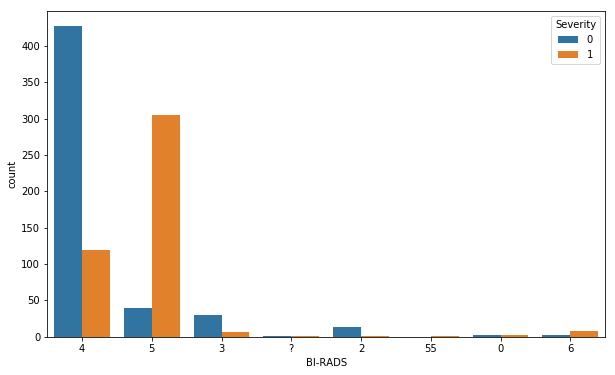

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df['BI-RADS'], hue=df['Severity'])

In [15]:
df.groupby('Severity')['BI-RADS'].value_counts()

Severity  BI-RADS
0         4          427
          5           40
          3           30
          2           13
          6            3
          0            2
          ?            1
1         5          305
          4          120
          6            8
          3            6
          0            3
          2            1
          55           1
          ?            1
Name: BI-RADS, dtype: int64

In [16]:
# BI-RADS는 1-5까지의 서수이므로 0, 6, 55 인 값들을 전처리해줘야함
# 0은 1로, 6과 55는 5로 변환
df['BI-RADS'][df['BI-RADS']=='0'] = '1'
df['BI-RADS'][df['BI-RADS']=='6'] = '5'
df['BI-RADS'][df['BI-RADS']=='55'] = '5'
df['BI-RADS'].value_counts()

4    547
5    357
3     36
2     14
1      5
?      2
Name: BI-RADS, dtype: int64

In [17]:
# Severity가 0일 때 BI-RADS가 4인 경우가 많으므로, Severity가 0이면 BI-RADS ?을 4로 채움
# Severity가 1일 때 BI-RADS가 5인 경우가 많으므로, Severity가 1이면 BI-RADS ?을 5로 채움
df['BI-RADS'][(df['BI-RADS']=='?') & (df['Severity']==0)] = '4'
df['BI-RADS'][(df['BI-RADS']=='?') & (df['Severity']==1)] = '5'
df['BI-RADS'].value_counts()

4    548
5    358
3     36
2     14
1      5
Name: BI-RADS, dtype: int64

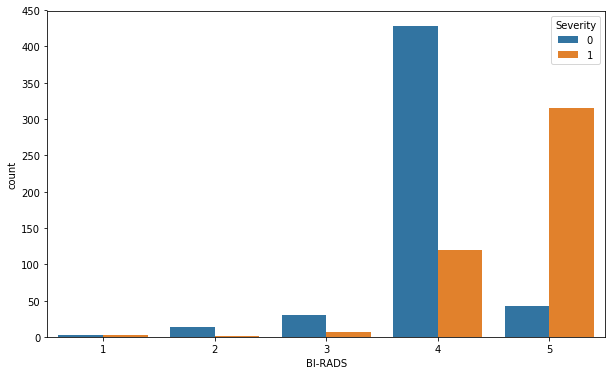

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['BI-RADS'], hue=df['Severity'])

### 2) Age

In [19]:
df['Age'].unique()

array(['43', '58', '28', '74', '65', '70', '42', '57', '60', '76', '64',
       '36', '54', '52', '59', '40', '66', '56', '75', '63', '45', '55',
       '46', '39', '81', '77', '67', '48', '78', '50', '61', '62', '44',
       '23', '80', '53', '49', '51', '25', '72', '73', '68', '33', '47',
       '29', '34', '71', '84', '24', '86', '41', '87', '21', '19', '35',
       '37', '79', '85', '69', '38', '32', '27', '83', '88', '26', '31',
       '?', '18', '82', '93', '30', '22', '96', '20'], dtype=object)

In [20]:
df['Age'].value_counts()

59    36
57    32
67    32
66    31
46    28
64    27
55    26
65    25
60    25
62    25
54    25
63    24
53    24
56    23
49    23
58    23
71    22
50    21
45    21
68    20
43    20
52    20
40    19
42    19
44    18
72    17
76    17
41    16
51    16
61    13
      ..
79     8
37     8
31     7
75     7
23     7
27     6
32     6
21     6
86     5
?      5
83     5
28     5
87     5
24     4
78     4
19     4
85     4
30     3
25     3
29     3
22     3
84     3
81     2
26     2
96     1
18     1
82     1
93     1
88     1
20     1
Name: Age, Length: 74, dtype: int64

In [21]:
df_age_not_NaN = df['Age'][df['Age'] != '?']
df['Age'][df['Age'] != '?'] = df_age_not_NaN.astype(int)

In [22]:
df_age_not_NaN.mean(), df_age_not_NaN.median(), df_age_not_NaN.mode()

(inf, 57.0, 0    59
 dtype: object)

In [23]:
# Age의 중간값으로 ?을 채움
df['Age'][df['Age'] == '?'] = df_age_not_NaN.median()
df['Age'] = df['Age'].astype(str).astype(float).astype(int)
df['Age'].unique()

array([43, 58, 28, 74, 65, 70, 42, 57, 60, 76, 64, 36, 54, 52, 59, 40, 66,
       56, 75, 63, 45, 55, 46, 39, 81, 77, 67, 48, 78, 50, 61, 62, 44, 23,
       80, 53, 49, 51, 25, 72, 73, 68, 33, 47, 29, 34, 71, 84, 24, 86, 41,
       87, 21, 19, 35, 37, 79, 85, 69, 38, 32, 27, 83, 88, 26, 31, 18, 82,
       93, 30, 22, 96, 20], dtype=int64)

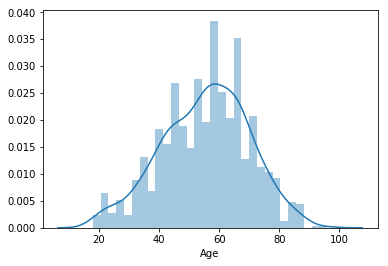

In [24]:
sns.distplot(df['Age'], bins=30)

### 3) Shape

In [25]:
df['Shape'].unique()

array(['1', '4', '?', '2', '3'], dtype=object)

In [26]:
df['Shape'].value_counts()

4    400
1    224
2    211
3     95
?     31
Name: Shape, dtype: int64

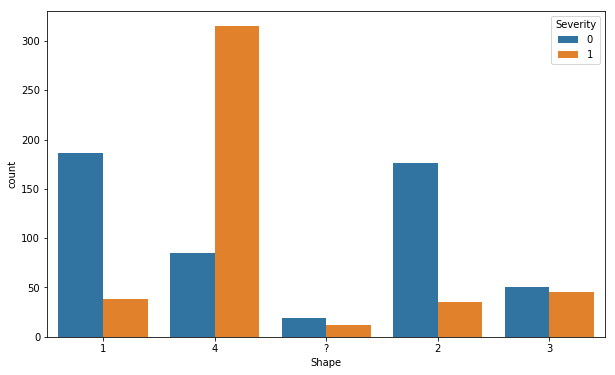

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df['Shape'], hue=df['Severity'])

In [28]:
df.groupby('Severity')['Shape'].value_counts()

Severity  Shape
0         1        186
          2        176
          4         85
          3         50
          ?         19
1         4        315
          3         45
          1         38
          2         35
          ?         12
Name: Shape, dtype: int64

In [29]:
df_shape_NaN = df['Shape'][(df['Shape']=='?') & (df['Severity']==0)]
df_shape_NaN.shape

(19,)

In [30]:
# Severity가 1일 때 Shape이 4인 경우가 많으므로, Severity가 1이면 Shape ?을 4로 채움
# Severity가 0일 때 Shape이 1 또는 2인 경우가 많으므로, Severity가 1이면 Shape ?을 1 또는 2로 채움
df['Shape'][(df['Shape']=='?') & (df['Severity']==1)] = '4'
temp = df['Shape'][(df['Shape']=='?') & (df['Severity']==0)]
temp[:10] = '1'
temp[10:] = '2'
df['Shape'][(df['Shape']=='?') & (df['Severity']==0)] = temp
df['Shape'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


4    412
1    234
2    220
3     95
Name: Shape, dtype: int64

In [31]:
df['Shape'].value_counts()

4    412
1    234
2    220
3     95
Name: Shape, dtype: int64

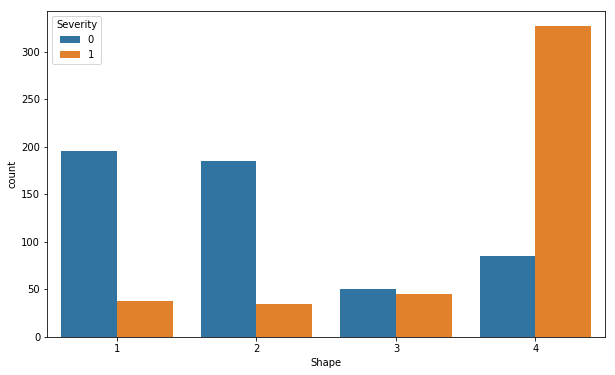

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df['Shape'], hue=df['Severity'])

### 4) Margin

In [33]:
df['Margin'].unique()

array(['1', '5', '?', '4', '3', '2'], dtype=object)

In [34]:
df['Margin'].value_counts()

1    357
4    280
5    136
3    116
?     48
2     24
Name: Margin, dtype: int64

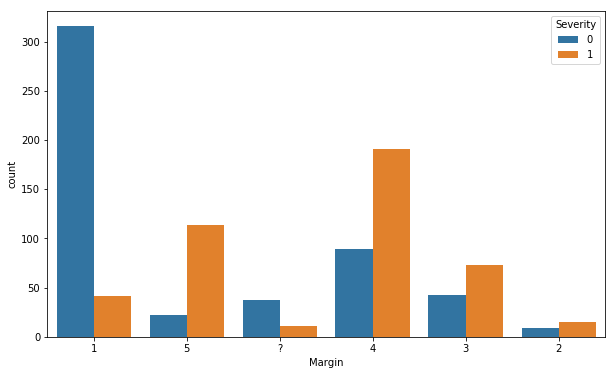

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(df['Margin'], hue=df['Severity'])

In [36]:
df.groupby('Severity')['Margin'].value_counts()

Severity  Margin
0         1         316
          4          89
          3          43
          ?          37
          5          22
          2           9
1         4         191
          5         114
          3          73
          1          41
          2          15
          ?          11
Name: Margin, dtype: int64

In [37]:
# Severity가 0일 때 Margin이 1인 경우가 많으므로, Severity가 0이면 Margin ?을 1로 채움
# Severity가 1일 때 Margin이 4인 경우가 많으므로, Severity가 1이면 Margin ?을 4로 채움
df['Margin'][(df['Margin']=='?') & (df['Severity']==0)] = '1'
df['Margin'][(df['Margin']=='?') & (df['Severity']==1)] = '4'
df['Margin'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1    394
4    291
5    136
3    116
2     24
Name: Margin, dtype: int64

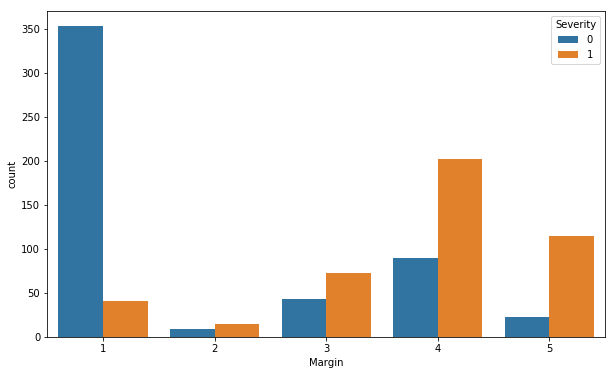

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['Margin'], hue=df['Severity'])

### 5) Density

In [39]:
df['Density'].unique()

array(['?', '3', '1', '2', '4'], dtype=object)

In [40]:
df['Density'].value_counts()

3    798
?     76
2     59
1     16
4     12
Name: Density, dtype: int64

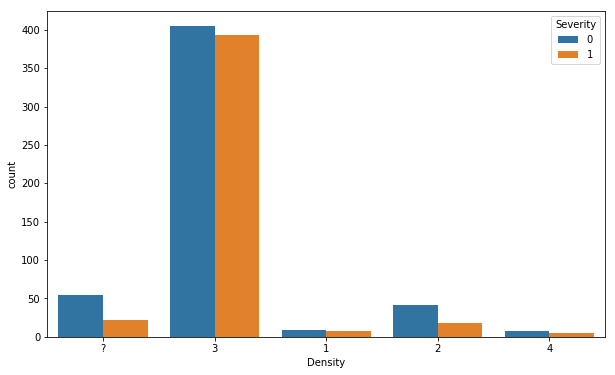

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(df['Density'], hue=df['Severity'])

In [42]:
df.groupby('Severity')['Density'].value_counts()

Severity  Density
0         3          405
          ?           54
          2           41
          1            9
          4            7
1         3          393
          ?           22
          2           18
          1            7
          4            5
Name: Density, dtype: int64

In [43]:
# 대부분 Density는 3이므로 ?을 3으로 채움
df['Density'][df['Density']=='?'] = '3'
df['Density'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3    874
2     59
1     16
4     12
Name: Density, dtype: int64

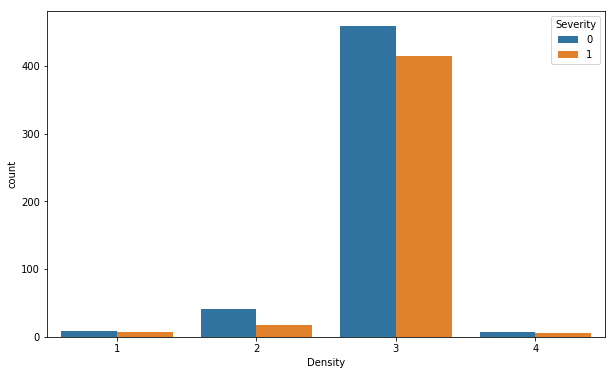

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df['Density'], hue=df['Severity'])

### 6) Severity

In [45]:
df['Severity'].unique()

array([1, 0], dtype=object)

In [46]:
df['Severity'].value_counts()

0    516
1    445
Name: Severity, dtype: int64

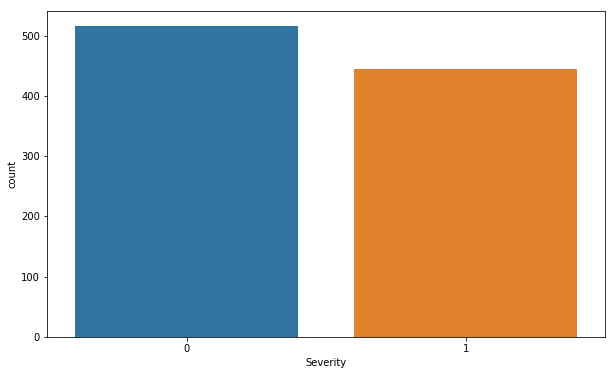

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df['Severity'])

In [48]:
# 컬럼별 ? 개수 출력
print('BI-RADS:  ', df['BI-RADS'][df['BI-RADS']=='?'].sum())
print('Age:      ', df['Age'][df['Age']=='?'].sum())
print('Shape:    ', df['Shape'][df['Shape']=='?'].sum())
print('Margin:   ', df['Margin'][df['Margin']=='?'].sum())
print('Density:  ', df['Density'][df['Density']=='?'].sum())
print('Severity: ', df['Severity'][df['Severity']=='?'].sum())

BI-RADS:   0
Age:       0
Shape:     0
Margin:    0
Density:   0
Severity:  0


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     961 non-null object
Age         961 non-null int32
Shape       961 non-null object
Margin      961 non-null object
Density     961 non-null object
Severity    961 non-null object
dtypes: int32(1), object(5)
memory usage: 88.8+ KB


## One-hot Encoding

In [50]:
df['BI-RADS'] = df['BI-RADS'].astype('category')
df['Shape'] = df['Shape'].astype('category')
df['Margin'] = df['Margin'].astype('category')
df['Density'] = df['Density'].astype('category')
df['Severity'] = df['Severity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     961 non-null category
Age         961 non-null int32
Shape       961 non-null category
Margin      961 non-null category
Density     961 non-null category
Severity    961 non-null int32
dtypes: category(4), int32(2)
memory usage: 59.5 KB


In [51]:
df_onehot = pd.get_dummies(df, columns=['Shape','Margin','Density'], drop_first=True)
df_onehot.head()

,BI-RADS,Age,Severity,Shape_2,Shape_3,Shape_4,Margin_2,Margin_3,Margin_4,Margin_5,Density_2,Density_3,Density_4
0,4,43,1,0,0,0,0,0,0,0,0,1,0
1,5,58,1,0,0,1,0,0,0,1,0,1,0
2,4,28,0,0,0,0,0,0,0,0,0,1,0
3,5,74,1,0,0,0,0,0,0,1,0,1,0
4,4,65,0,0,0,0,0,0,0,0,0,1,0


## Feature Selection

In [52]:
x = df_onehot.drop(['BI-RADS','Severity'], axis=1)
y = df_onehot['Severity']

## Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Machine Learning: Classification

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score

### 1) LogisticRegression

In [56]:
logistic_regression = LogisticRegression(random_state=1)  # C = ?
logistic_regression.fit(x_train, y_train)
pred_logistic = logistic_regression.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
logistic_regression.coef_, logistic_regression.intercept_

(array([[ 0.03485387, -0.38647923,  0.46181914,  1.5977559 ,  0.98408949,
          1.00679903,  1.426075  ,  1.54863065, -0.87192068, -0.37404397,
         -0.46605265]]), array([-3.20905852]))

In [58]:
print(confusion_matrix(y_test, pred_logistic))

[[122  35]
 [ 26 106]]


In [59]:
print(classification_report(y_test, pred_logistic))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       157
           1       0.75      0.80      0.78       132

   micro avg       0.79      0.79      0.79       289
   macro avg       0.79      0.79      0.79       289
weighted avg       0.79      0.79      0.79       289



In [60]:
print('f1 정확도 : ', f1_score(y_test, pred_logistic))

f1 정확도 :  0.7765567765567765


In [334]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(logistic_regression, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(logistic_regression, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.8197965061908501
cv 테스트 세트 정확도 :  0.7889384478144514


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [335]:
print('훈련 세트 정확도 :   ', logistic_regression.score(x_train, y_train))
print('테스트 세트 정확도 : ', logistic_regression.score(x_test, y_test))

훈련 세트 정확도 :    0.8318452380952381
테스트 세트 정확도 :  0.7889273356401384


### 2) KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()  # n_neighbors = ?
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [338]:
print(confusion_matrix(y_test, pred_knn))

[[122  35]
 [ 35  97]]


In [339]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.73      0.73      0.73       132

   micro avg       0.76      0.76      0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



In [340]:
print('f1 정확도 : ', f1_score(y_test, pred_knn))

f1 정확도 :  0.7348484848484848


In [341]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(knn, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7767229849083737
cv 테스트 세트 정확도 :  0.7193577163247101


In [342]:
print('훈련 세트 정확도 :   ', knn.score(x_train, y_train))
print('테스트 세트 정확도 : ', knn.score(x_test, y_test))

훈련 세트 정확도 :    0.8303571428571429
테스트 세트 정확도 :  0.7577854671280276


### 3) DecisionTreeClassifier

In [62]:
dtree = DecisionTreeClassifier(random_state=1)  # max_depth = ?
dtree.fit(x_train, y_train)
pred_dtree = dtree.predict(x_test)

In [344]:
dtree.feature_importances_

array([0.32319867, 0.01355528, 0.02064436, 0.4889542 , 0.01933411,
       0.01858635, 0.04131129, 0.03556366, 0.01947619, 0.01718879,
       0.0021871 ])

In [345]:
print(confusion_matrix(y_test, pred_dtree))

[[119  38]
 [ 31 101]]


In [346]:
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       157
           1       0.73      0.77      0.75       132

   micro avg       0.76      0.76      0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



In [347]:
print('f1 정확도 : ', f1_score(y_test, pred_dtree))

f1 정확도 :  0.7453874538745389


In [348]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(dtree, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(dtree, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7736260219370982
cv 테스트 세트 정확도 :  0.6674397859054416


In [349]:
print('훈련 세트 정확도 :   ', dtree.score(x_train, y_train))
print('테스트 세트 정확도 : ', dtree.score(x_test, y_test))

훈련 세트 정확도 :    0.9122023809523809
테스트 세트 정확도 :  0.7612456747404844


### 4) RandomForestClassifier

In [63]:
forest = RandomForestClassifier(random_state=1)  # n_estimators = ?
forest.fit(x_train, y_train)
pred_forest = forest.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [351]:
print(confusion_matrix(y_test, pred_forest))

[[121  36]
 [ 27 105]]


In [352]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       157
           1       0.74      0.80      0.77       132

   micro avg       0.78      0.78      0.78       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.78      0.78      0.78       289



In [353]:
print('f1 정확도 : ', f1_score(y_test, pred_forest))

f1 정확도 :  0.7692307692307692


In [354]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(forest, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(forest, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7646929097204038
cv 테스트 세트 정확도 :  0.7096639904846863


In [355]:
print('훈련 세트 정확도 :   ', forest.score(x_train, y_train))
print('테스트 세트 정확도 : ', forest.score(x_test, y_test))

훈련 세트 정확도 :    0.9032738095238095
테스트 세트 정확도 :  0.7820069204152249


### 5) SVC

In [64]:
svc = SVC(random_state=1)  # C = ?, gamma = ?
svc.fit(x_train, y_train)
pred_svc= svc.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [357]:
print(confusion_matrix(y_test, pred_svc))

[[120  37]
 [ 33  99]]


In [358]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       157
           1       0.73      0.75      0.74       132

   micro avg       0.76      0.76      0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



In [359]:
print('f1 정확도 : ', f1_score(y_test, pred_svc))

f1 정확도 :  0.7388059701492536


In [360]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(svc, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(svc, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.8034559865667485
cv 테스트 세트 정확도 :  0.7157300029735355


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

In [361]:
print('훈련 세트 정확도 :   ', svc.score(x_train, y_train))
print('테스트 세트 정확도 : ', svc.score(x_test, y_test))

훈련 세트 정확도 :    0.8229166666666666
테스트 세트 정확도 :  0.7577854671280276


### 5') SVC + GridSearchCV

In [65]:
params = {'C':[0.1,0.5,1,2,4,8,20,200], 'gamma':[0.1,1,10,100,1000,10000]}
grid = GridSearchCV(svc, param_grid = params)
grid.fit(x_train, y_train)
pred_grid = grid.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [363]:
grid.best_score_, grid.best_params_

(0.8095238095238095, {'C': 4, 'gamma': 0.1})

In [364]:
print(confusion_matrix(y_test, pred_grid))

[[124  33]
 [ 28 104]]


In [365]:
print(classification_report(y_test, pred_grid))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       157
           1       0.76      0.79      0.77       132

   micro avg       0.79      0.79      0.79       289
   macro avg       0.79      0.79      0.79       289
weighted avg       0.79      0.79      0.79       289



In [366]:
print('f1 정확도 : ', f1_score(y_test, pred_grid))

f1 정확도 :  0.7732342007434945


In [328]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(grid, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(grid, x_test, y_test, cv=5)))

C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of rel

cv 훈련 세트 정확도 :    0.797574616474852
cv 테스트 세트 정확도 :  0.7090692833779364


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [367]:
print('훈련 세트 정확도 :   ', grid.score(x_train, y_train))
print('테스트 세트 정확도 : ', grid.score(x_test, y_test))

훈련 세트 정확도 :    0.8601190476190477
테스트 세트 정확도 :  0.7889273356401384


### 6) VotingClassifier

In [66]:
vote = VotingClassifier(estimators=[('lr',logistic_regression),('kn',knn),('dt',dtree),('svc',svc)], voting='hard') # 또는 voting='soft'
vote.fit(x_train, y_train)
pred_vote = vote.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [370]:
print(confusion_matrix(y_test, pred_vote))

[[126  31]
 [ 34  98]]


In [371]:
print(classification_report(y_test, pred_vote))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       157
           1       0.76      0.74      0.75       132

   micro avg       0.78      0.78      0.78       289
   macro avg       0.77      0.77      0.77       289
weighted avg       0.77      0.78      0.77       289



In [372]:
print('f1 정확도 : ', f1_score(y_test, pred_vote))

f1 정확도 :  0.7509578544061303


In [373]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(vote, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(vote, x_test, y_test, cv=5)))

C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warn

cv 훈련 세트 정확도 :    0.8079114868431443
cv 테스트 세트 정확도 :  0.7366636931311329


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [374]:
print('훈련 세트 정확도 :   ', vote.score(x_train, y_train))
print('테스트 세트 정확도 : ', vote.score(x_test, y_test))

훈련 세트 정확도 :    0.8511904761904762
테스트 세트 정확도 :  0.7750865051903114


### 6') VotingClassifier + GridSearchCV

In [70]:
params = {
    'lr__solver':['liblinear'], 'lr__penalty':['l2'], 'lr__C':[0.1,1,5,7,10,20,100],
    'kn__n_neighbors':[3,5,7,10,20],
    'dt__max_depth':[2,3,4,5,6,7,8,10],
    'svc__C':[0.1,1,4,8], 'svc__gamma':[0.1,1,10]
}
grid_vote = GridSearchCV(vote, param_grid = params)
grid_vote.fit(x_train, y_train)
pred_grid_vote = grid_vote.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [380]:
grid_vote.best_score_, grid_vote.best_params_

(0.8199404761904762,
 {'dt__max_depth': 3,
  'kn__n_neighbors': 3,
  'lr__C': 5,
  'lr__penalty': 'l2',
  'lr__solver': 'liblinear',
  'svc__C': 8,
  'svc__gamma': 0.1})

In [381]:
print(confusion_matrix(y_test, pred_grid_vote))

[[128  29]
 [ 31 101]]


In [382]:
print(classification_report(y_test, pred_grid_vote))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       157
           1       0.78      0.77      0.77       132

   micro avg       0.79      0.79      0.79       289
   macro avg       0.79      0.79      0.79       289
weighted avg       0.79      0.79      0.79       289



In [383]:
print('f1 정확도 : ', f1_score(y_test, pred_grid_vote))

f1 정확도 :  0.7709923664122137


In [386]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(grid_vote, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(grid_vote, x_test, y_test, cv=5)))

C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will chang

cv 훈련 세트 정확도 :    0.7975079489769199


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will chang

cv 테스트 세트 정확도 :  0.7648528099910793


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [387]:
print('훈련 세트 정확도 :   ', grid_vote.score(x_train, y_train))
print('테스트 세트 정확도 : ', grid_vote.score(x_test, y_test))

훈련 세트 정확도 :    0.8556547619047619
테스트 세트 정확도 :  0.7923875432525952


### 7) BaggingClassifier

In [67]:
bag = BaggingClassifier(dtree, oob_score=True)  # n_estimators =[10,20,30,40,50], max_samples =[0.5,0.6,0.7,0.8,0.9,1]
bag.fit(x_train, y_train)
pred_bag = bag.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [389]:
bag.oob_score_

0.7633928571428571

In [390]:
print(confusion_matrix(y_test, pred_bag))

[[119  38]
 [ 27 105]]


In [391]:
print(classification_report(y_test, pred_bag))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       157
           1       0.73      0.80      0.76       132

   micro avg       0.78      0.78      0.78       289
   macro avg       0.77      0.78      0.77       289
weighted avg       0.78      0.78      0.78       289



In [392]:
print('f1 정확도 : ', f1_score(y_test, pred_bag))

f1 정확도 :  0.7636363636363637


In [393]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(bag, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(bag, x_test, y_test, cv=5)))

C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probabl

cv 훈련 세트 정확도 :    0.7721334846236653
cv 테스트 세트 정확도 :  0.7132917038358608


C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ATIV\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probabl

In [394]:
print('훈련 세트 정확도 :   ', bag.score(x_train, y_train))
print('테스트 세트 정확도 : ', bag.score(x_test, y_test))

훈련 세트 정확도 :    0.90625
테스트 세트 정확도 :  0.7750865051903114


### 8) AdaBoostClassifier

In [68]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=0.1)
ada_boost.fit(x_train, y_train)
pred_ada = ada_boost.predict(x_test)

In [397]:
ada_boost.feature_importances_

array([5.77849797e-01, 5.82237429e-02, 2.82090815e-02, 1.35729897e-01,
       1.34669820e-02, 2.53904940e-02, 1.09047390e-01, 2.81454468e-02,
       1.89927538e-03, 2.19710277e-02, 6.68657655e-05])

In [398]:
print(confusion_matrix(y_test, pred_ada))

[[123  34]
 [ 25 107]]


In [399]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       157
           1       0.76      0.81      0.78       132

   micro avg       0.80      0.80      0.80       289
   macro avg       0.79      0.80      0.80       289
weighted avg       0.80      0.80      0.80       289



In [400]:
print('f1 정확도 : ', f1_score(y_test, pred_ada))

f1 정확도 :  0.783882783882784


In [401]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(ada_boost, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(ada_boost, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7707414473164669
cv 테스트 세트 정확도 :  0.7335117454653582


In [402]:
print('훈련 세트 정확도 :   ', ada_boost.score(x_train, y_train))
print('테스트 세트 정확도 : ', ada_boost.score(x_test, y_test))

훈련 세트 정확도 :    0.9107142857142857
테스트 세트 정확도 :  0.7958477508650519


### 9) GradientBoostingClassifier

In [69]:
gradient_boost = GradientBoostingClassifier(n_estimators=500, subsample=0.5, max_depth=3, learning_rate=0.10)
gradient_boost.fit(x_train, y_train)
pred_gradient = gradient_boost.predict(x_test)

In [73]:
print(confusion_matrix(y_test, pred_gradient))

[[117  40]
 [ 30 102]]


In [74]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       157
           1       0.72      0.77      0.74       132

   micro avg       0.76      0.76      0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



In [75]:
print('f1 정확도 : ', f1_score(y_test, pred_gradient))

f1 정확도 :  0.7445255474452555


In [76]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(gradient_boost, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(gradient_boost, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7841965610543772
cv 테스트 세트 정확도 :  0.7540886113589057


In [77]:
print('훈련 세트 정확도 :   ', gradient_boost.score(x_train, y_train))
print('테스트 세트 정확도 : ', gradient_boost.score(x_test, y_test))

훈련 세트 정확도 :    0.9047619047619048
테스트 세트 정확도 :  0.7577854671280276


## Evaluation

In [71]:
models = [logistic_regression, knn, dtree, svc, vote, bag, ada_boost, gradient_boost]

for model in models:
    print(model)
    print('train score: ', model.score(x_train, y_train))
    print('test score:  ', model.score(x_test, y_test))
    print('f1 score:    ', f1_score(y_test, model.predict(x_test)))
    print('-'*20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train score:  0.8318452380952381
test score:   0.7889273356401384
f1 score:     0.7765567765567765
--------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
train score:  0.8303571428571429
test score:   0.7577854671280276
f1 score:     0.7348484848484848
--------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            sp